# Problema 2

In [3]:
import numpy as np
from metrics import save_metrics, print_table, plot_combined_roc_curve, plot_combined_pr_curve, print_matrix, confusion_matrix
from models import LogisticRegressionMulticlass
from models import LinearDiscriminantAnalysis
from models import RandomForestClassifier

In [4]:
def cargar_datos(file_path):
    print(f"Cargando datos desde: {file_path}")
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)  # Cargar datos desde archivo CSV
    y = data[:, 0] 
    X = data[:, 1:]  # Características
    print(f"Datos cargados. Dimensiones de X: {X.shape}, Dimensiones de y: {y.shape}")
    return X, y


### Cargar datos

In [5]:
file_train = '/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp3ml/machineLearningTP2/problema2/data/processed/diabetes_train_oversampled.csv'
file_val = '/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp3ml/machineLearningTP2/problema2/data/processed/diabetes_validation.csv'
file_test = '/Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp3ml/machineLearningTP2/problema2/data/diabetes_test.csv'  # Archivo de test

X_train, y_train = cargar_datos(file_train)
X_val, y_val = cargar_datos(file_val)
X_test, y_test = cargar_datos(file_test)  # Cargando datos de test

print(f"Clases en y_train: {np.unique(y_train)}, Clases en y_val: {np.unique(y_val)}, Clases en y_test: {np.unique(y_test)}")


Cargando datos de entrenamiento y validación preprocesados...
Cargando datos desde: /Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp3ml/machineLearningTP2/problema2/data/processed/diabetes_train_oversampled.csv
Datos cargados. Dimensiones de X: (410096, 21), Dimensiones de y: (410096,)
Cargando datos desde: /Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp3ml/machineLearningTP2/problema2/data/processed/diabetes_validation.csv
Datos cargados. Dimensiones de X: (40588, 21), Dimensiones de y: (40588,)
Cargando datos desde: /Users/victoria/Desktop/5tocuatrimestre/ml/tps/tp3ml/machineLearningTP2/problema2/data/diabetes_test.csv
Datos cargados. Dimensiones de X: (25368, 21), Dimensiones de y: (25368,)
Clases en y_train: [0. 1. 2.], Clases en y_val: [0. 1. 2.], Clases en y_test: [0. 1. 2.]


### Modelo de Regresión Logística 

Entrenando modelo de Regresión Logística Multinomial...
Iteración 0: Costo = 0.6563574477288445
Iteración 100: Costo = 0.5984186939695655
Iteración 200: Costo = 0.5892439939882013
Iteración 300: Costo = 0.5821633583331026
Iteración 400: Costo = 0.5765396791548195
Iteración 500: Costo = 0.5720218185148197
Iteración 600: Costo = 0.5683549307015049
Iteración 700: Costo = 0.5653475469769149
Iteración 800: Costo = 0.5628544474989726
Iteración 900: Costo = 0.56076486285106
Iteración 0: Costo = 0.6688489833928665
Iteración 100: Costo = 0.6389670362041017
Iteración 200: Costo = 0.637022682929367
Iteración 300: Costo = 0.6355876854470565
Iteración 400: Costo = 0.6344981292335443
Iteración 500: Costo = 0.633660296047247
Iteración 600: Costo = 0.6330086736612587
Iteración 700: Costo = 0.6324959252177784
Iteración 800: Costo = 0.6320874421491615
Iteración 900: Costo = 0.6317577182156243
Iteración 0: Costo = 0.6730115051634119
Iteración 100: Costo = 0.6348523601563337
Iteración 200: Costo = 0.62889

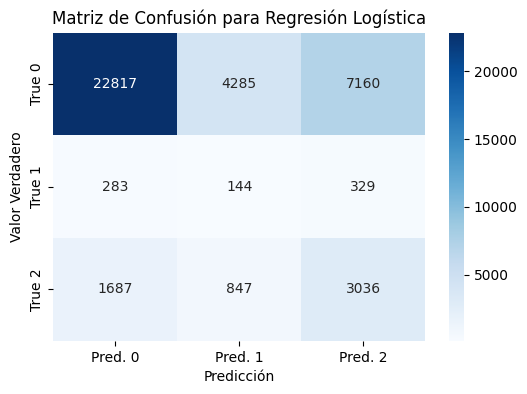

In [6]:
lr_model = LogisticRegressionMulticlass(alpha=0.001, lambda_=0.5, num_iters=1000, num_labels=3)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
y_prob_lr = lr_model.sigmoid(np.dot(lr_model.preprocess_data(X_val), lr_model.all_theta.T))  

matriz_lr = confusion_matrix(y_val, y_pred_lr)
print_matrix(matriz_lr, "Regresión Logística")


La mayoría de las predicciones correctas se concentran en la clase 0, donde el modelo predice correctamente 22,817 casos, pero comete errores significativos al confundir la clase 2 con las demás (1,687 errores prediciendo la clase 0 y 3,036 errores prediciendo la clase 2).



### Modelo de LDA

Entrenando modelo de LDA...


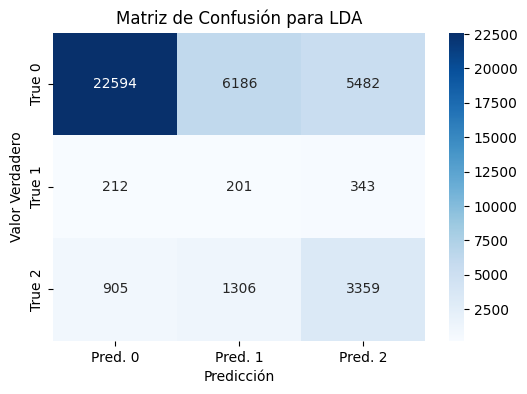

In [7]:
lda_model = LinearDiscriminantAnalysis(num_components=None)
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_val)
y_prob_lda = lda_model.transform(X_val)

matriz_lda = confusion_matrix(y_val, y_pred_lda)
print_matrix(matriz_lda, "LDA")

El modelo tiene un mejor desempeño en la clase 0 con 22,594 predicciones correctas, aunque aún tiene un número significativo de errores al confundir las clases 1 y 2 (905 errores al predecir la clase 0 y 1,306 al predecir la clase 1), lo que indica que este modelo, al igual que la regresión logísitca, tiende a confundirse en estas dos clases minoritarias.



### Modelo de Random Forest

Entrenando modelo de Bosque Aleatorio...
Clases predichas por los árboles: [0. 1. 2.]


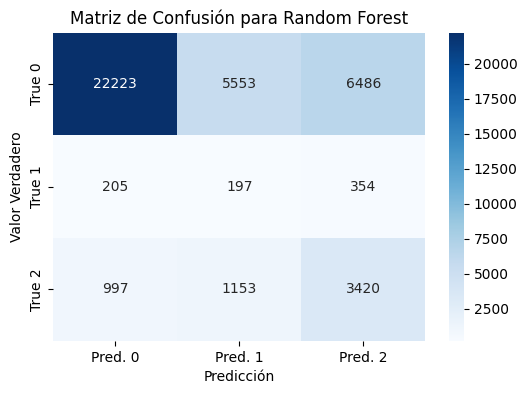

In [8]:
rf_model = RandomForestClassifier(n_trees=15, max_depth=6)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)

matriz_rf = confusion_matrix(y_val, y_pred_rf)
print_matrix(matriz_rf, "Random Forest")


El modelo logra predecir correctamente la clase 0 en 22,223 casos, pero tiene una cantidad considerable de errores al confundir las clases 1 y 2, lo que muestra un patrón similar a los modelos anteriores con una mejor precisión en la clase mayoritaria. Esto puede deberse a que las clases 1 y 2 tengan características compartidas.

### Resultados del datset de Validación

In [9]:
resultados = {}
resultados["Logistic Regression"] = save_metrics(y_val, y_pred_lr, y_prob_lr)
resultados["LDA"] = save_metrics(y_val, y_pred_lda, y_prob_lda)
resultados["Random Forest"] = save_metrics(y_val, y_pred_rf, y_prob_rf)

print_table(resultados)


Guardando métricas...
Modelo              Accuracy  Precision Recall    F1-Score  AUC-ROC   AUC-PR    
Logistic Regression 0.6405    0.4121    0.4672    0.3993    0.6957    0.4156    
LDA                 0.6444    0.4483    0.5095    0.4275    0.5808    0.3729    
Random Forest       0.6366    0.4369    0.5077    0.4180    0.7306    0.4437    


Luego de evaluar el modelo con el set de validación se llegó a la conclusión de que Logistic Regression tiene la menor precisión y F1-Score, lo que sugiere que no es tan efectivo para capturar correctamente tanto la clase positiva como negativa. Sin embargo, tiene un AUC-ROC relativamente alto (0.6957). Por otro lado, LDA tiene métricas un poco superiores en cuanto a F1-Score (0.4275) y Recall, aunque su AUC-ROC es el más bajo (0.5808), lo que indica dificultades en la discriminación entre clases. Por último, Random Forest tiene un AUC-ROC superior (0.7306), lo que sugiere una mejor capacidad para diferenciar entre las clases. Además, su F1-Score y Precision son competitivos en comparación con los otros modelos.


Generando curvas ROC y Precision-Recall...


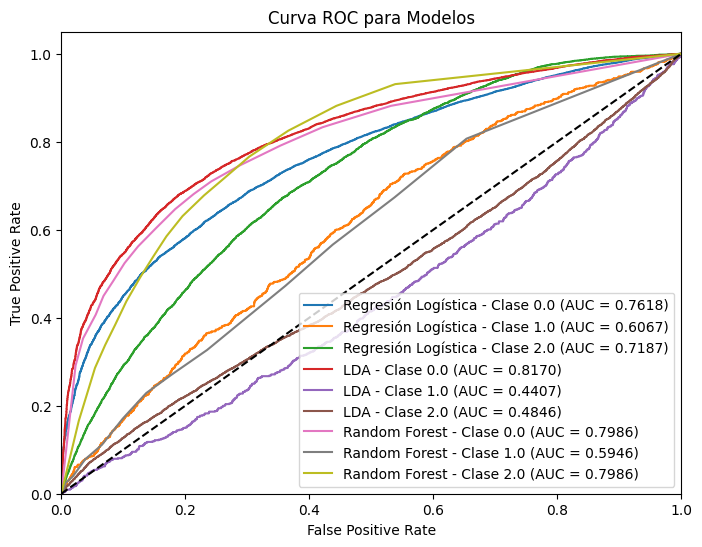

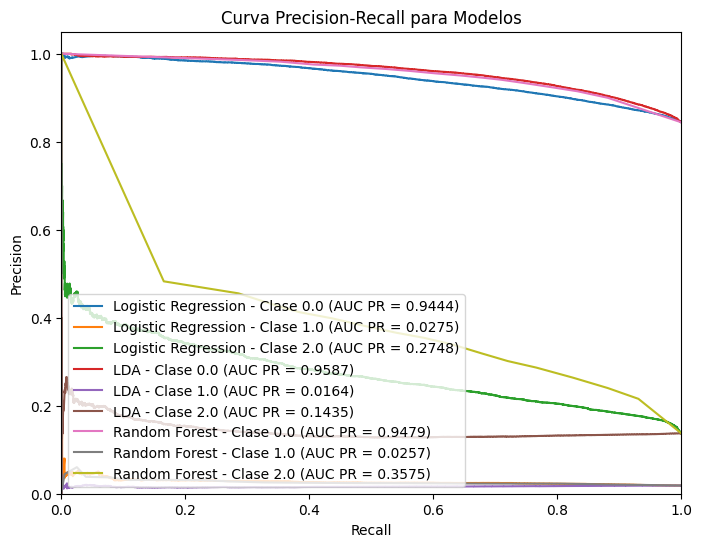

In [10]:
plot_combined_roc_curve(y_val, [y_prob_lr, y_prob_lda, y_prob_rf], "Modelos")
plot_combined_pr_curve(y_val, [y_prob_lr, y_prob_lda, y_prob_rf], "Modelos")

En la curva ROC, se observa que LDA tiene el mejor rendimiento en la clase 0 (AUC = 0.8170), mientras que Random Forest muestra un desempeño consistente en las clases 0 y 2 (AUC = 0.7986), destacándose en comparación con los otros modelos. En la curva Precision-Recall, Random Forest y Regresión Logística tienen un excelente rendimiento en la clase 0 (AUC PR cercano a 0.95), pero los modelos fallan notablemente en las clases 1 y 2, donde las precisiones caen drásticamente, mostrando las dificultades en manejar las clases minoritarias.










### Resultados del dataset de Test


Evaluación en el conjunto de test...


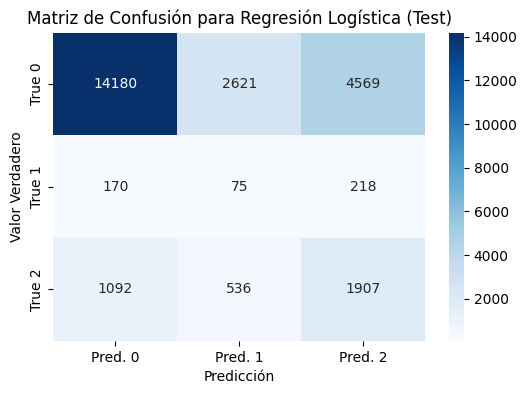

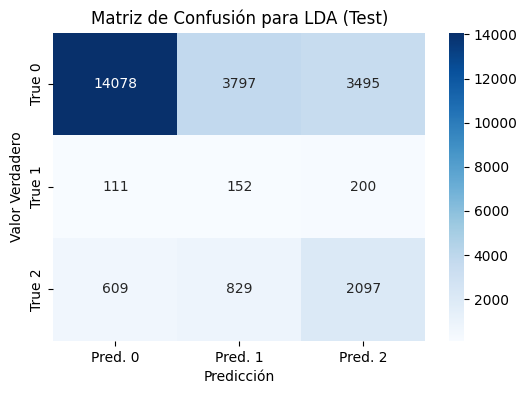

Clases predichas por los árboles: [0. 1. 2.]


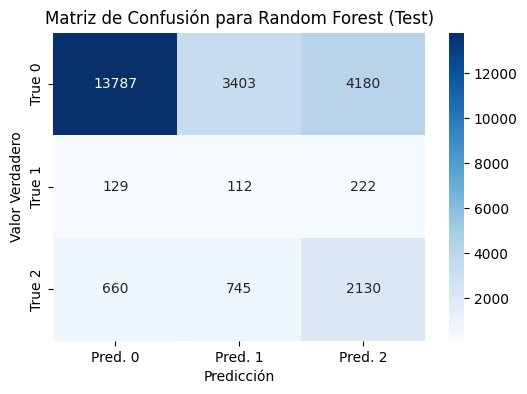

In [12]:
y_pred_lr_test = lr_model.predict(X_test)
y_prob_lr_test = lr_model.sigmoid(np.dot(lr_model.preprocess_data(X_test), lr_model.all_theta.T))
matriz_lr_test = confusion_matrix(y_test, y_pred_lr_test)
print_matrix(matriz_lr_test, "Regresión Logística (Test)")

y_pred_lda_test = lda_model.predict(X_test)
y_prob_lda_test = lda_model.transform(X_test)
matriz_lda_test = confusion_matrix(y_test, y_pred_lda_test)
print_matrix(matriz_lda_test, "LDA (Test)")

y_pred_rf_test = rf_model.predict(X_test)
y_prob_rf_test = rf_model.predict_proba(X_test)
matriz_rf_test = confusion_matrix(y_test, y_pred_rf_test)
print_matrix(matriz_rf_test, "Random Forest (Test)")


En las matrices de confusión del set de test, todos los modelos muestran un mejor desempeño en la clase mayoritaria (clase 0), con variaciones en el manejo de las clases minoritarias, siendo Random Forest el que logra capturar más casos de la clase 2 en comparación con los otros modelos. Sin embargo, todos los modelos aún tienen dificultades para predecir correctamente la clase 1, lo que refleja la persistencia del desbalance y la complejidad de las clases minoritarias como se observó con el dataset de validación










In [13]:
resultados_test = {}
resultados_test["Logistic Regression"] = save_metrics(y_test, y_pred_lr_test, y_prob_lr_test)
resultados_test["LDA"] = save_metrics(y_test, y_pred_lda_test, y_prob_lda_test)
resultados_test["Random Forest"] = save_metrics(y_test, y_pred_rf_test, y_prob_rf_test)

print_table(resultados_test)


Modelo              Accuracy  Precision Recall    F1-Score  AUC-ROC   AUC-PR    
Logistic Regression 0.6371    0.4088    0.4550    0.3946    0.6943    0.4145    
LDA                 0.6436    0.4484    0.5268    0.4287    0.5794    0.3720    
Random Forest       0.6319    0.4327    0.4965    0.4126    0.7267    0.4399    


Los resultados del set de test muestran que LDA tiene la mayor precisión general (Accuracy = 0.6436) y el mejor F1-Score (0.4287), mientras que Random Forest sobresale en términos de AUC-ROC (0.7267) y AUC-PR (0.4399), lo que indica una mejor capacidad de discriminación en la curva ROC. Logistic Regression tiene el rendimiento más bajo en todas las métricas, con menor F1-Score y AUC-PR, lo que confirma su menor desempeño en comparación con los otros dos modelos.



Generando curvas ROC y Precision-Recall para test...


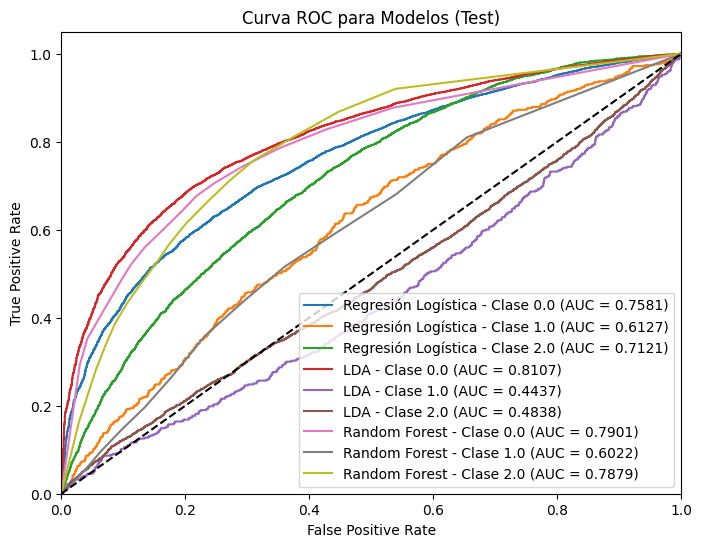

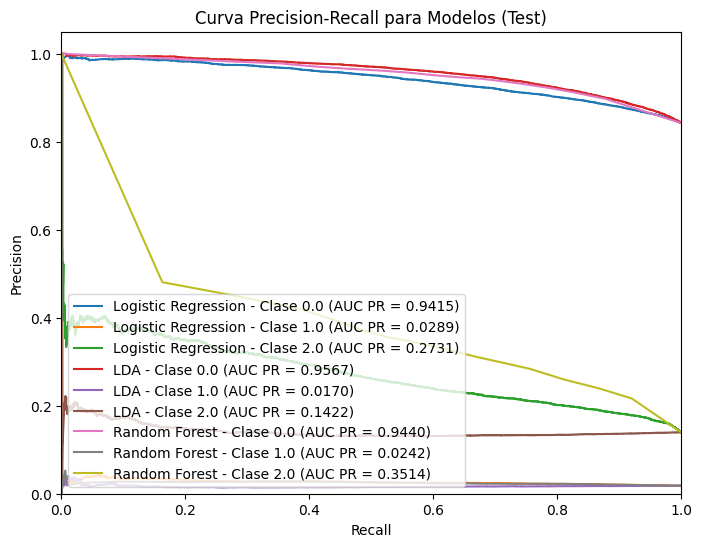

In [14]:
plot_combined_roc_curve(y_test, [y_prob_lr_test, y_prob_lda_test, y_prob_rf_test], "Modelos (Test)")
plot_combined_pr_curve(y_test, [y_prob_lr_test, y_prob_lda_test, y_prob_rf_test], "Modelos (Test)")

Al igual que lo observado en los otros resultados, se puede observar que se detectan de manera correcta las muestras de la clase 0 y el rendimiento decae abruptamente para clasificar la clase 1 y la clase 2.

## Evaluación final

Me quedaría con Random Forest. Aunque LDA tiene una ligera ventaja en Accuracy y F1-Score, Random Forest ofrece un mejor equilibrio entre las métricas y una mayor capacidad para manejar las clases minoritarias, especialmente la clase 2, que es crítica para este tipo de problemas de clasficación desbalanceada. Sin embargo, las métricas obtenidas no son del todo satisfactorias, y sería necesario explorar otras formas de mejorar el rendimiento. Esto podría incluir técnicas adicionales de re-balanceo de clases, ajuste de hiperparámetros o incluso considerar otros modelos más avanzados, como redes neuronales o ensamblados que combinen múltiples enfoques.








